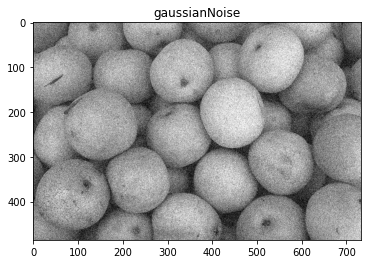

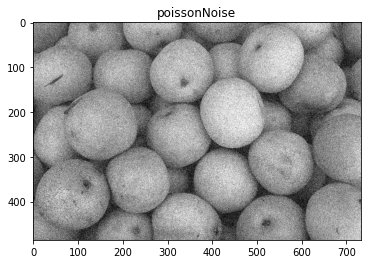

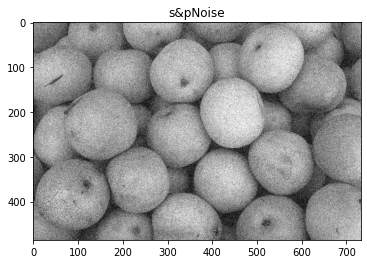

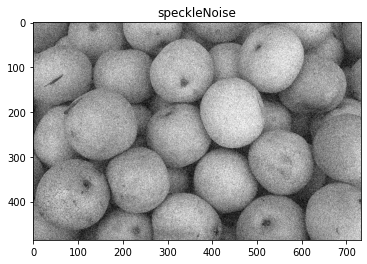

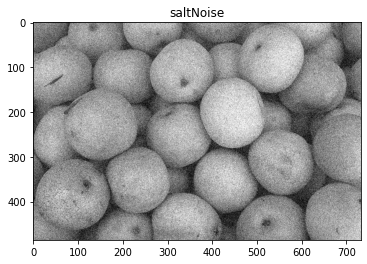

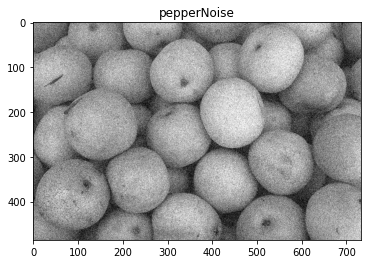


Arithmetic Mean Filter on different Noises:



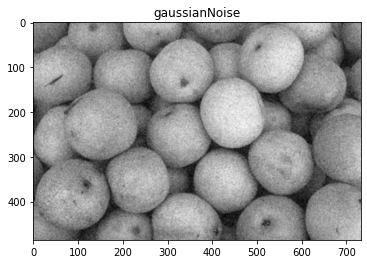

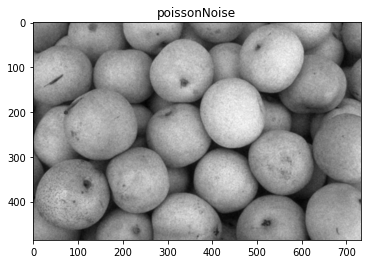

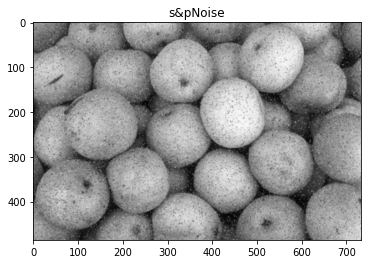

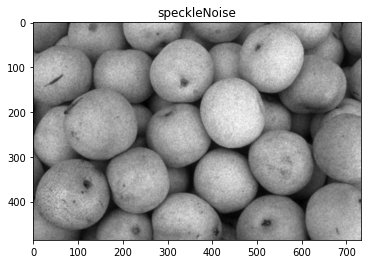

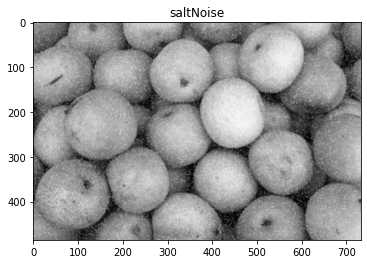

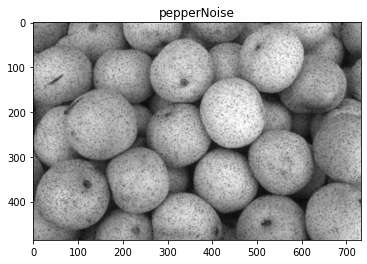


Min Filter on different Noises:



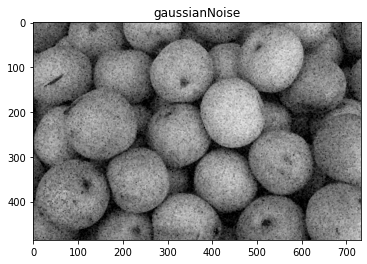

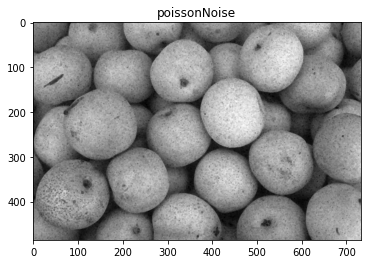

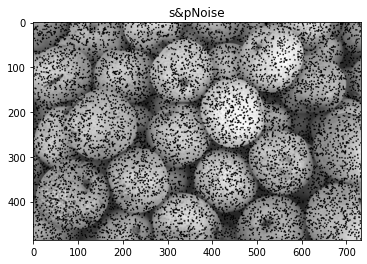

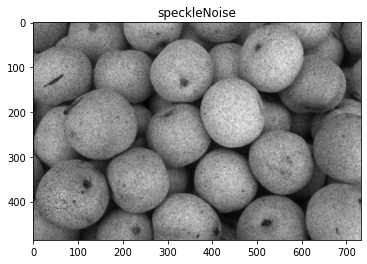

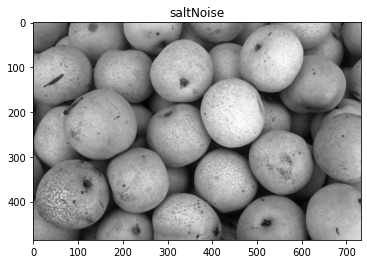

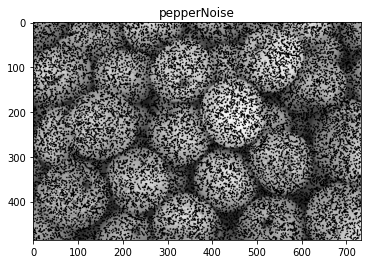


Max Filter on different Noises:



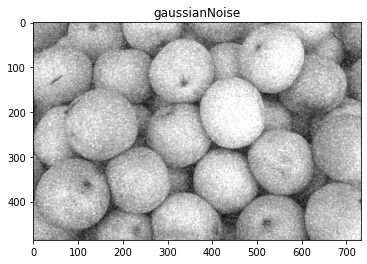

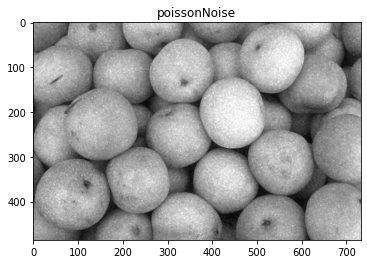

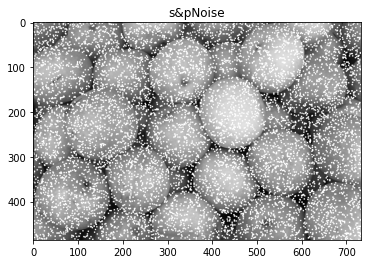

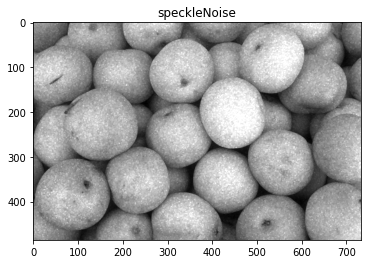

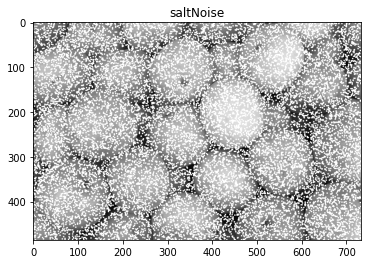

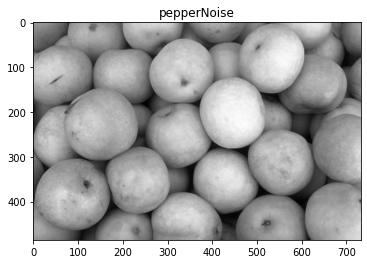


Median Filter on different Noises:



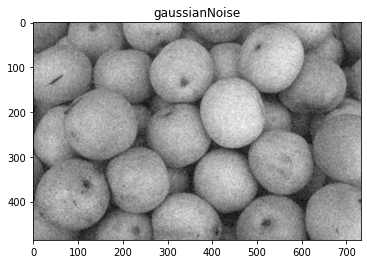

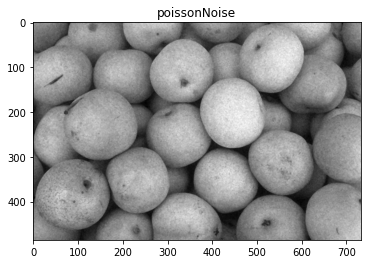

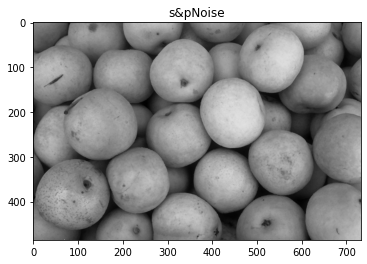

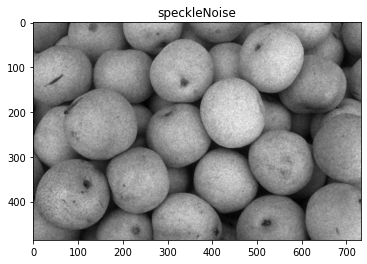

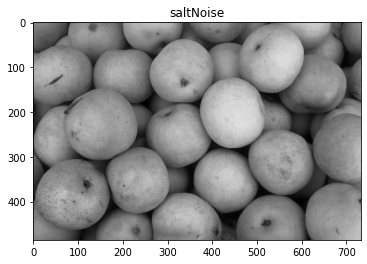

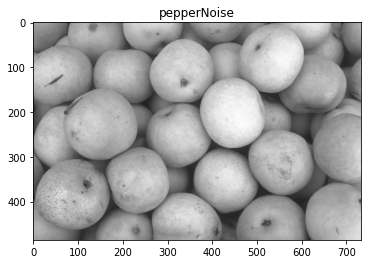


Geometric Mean Filter on different Noises:



/usr/local/lib/python3.6/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


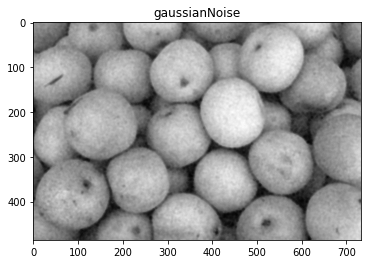

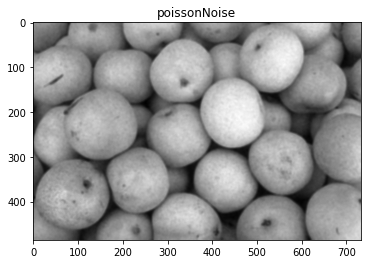

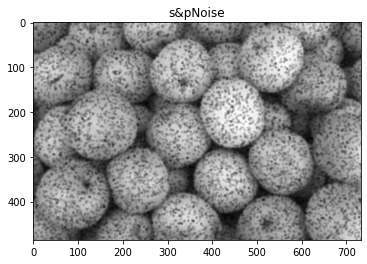

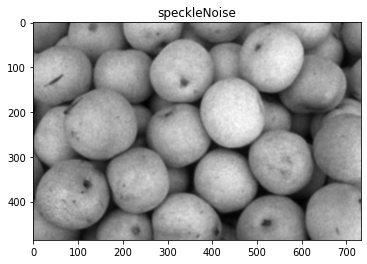

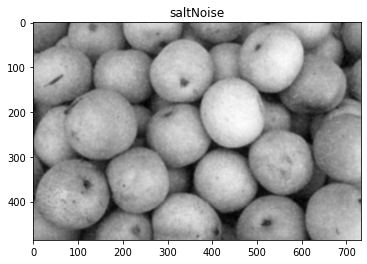

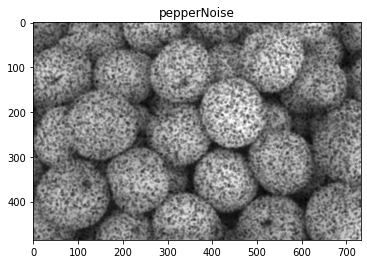


Harmonic Mean Filter on different Noises:



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide



Contra Harmonic Mean Filter on different Noises:



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in reciprocal


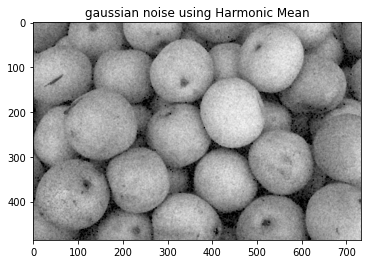

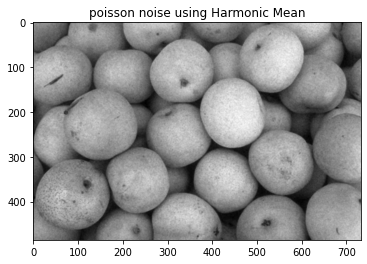

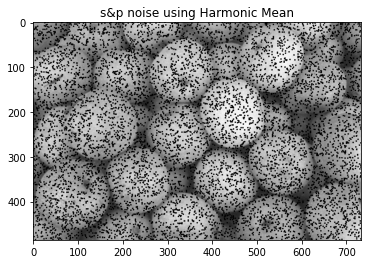

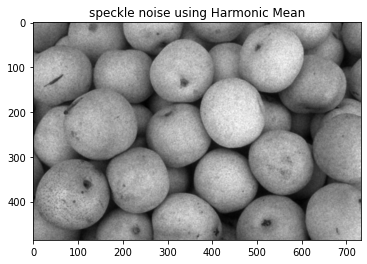

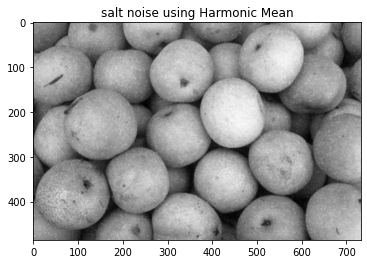

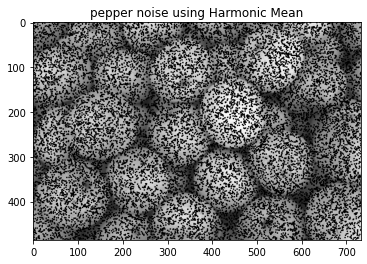

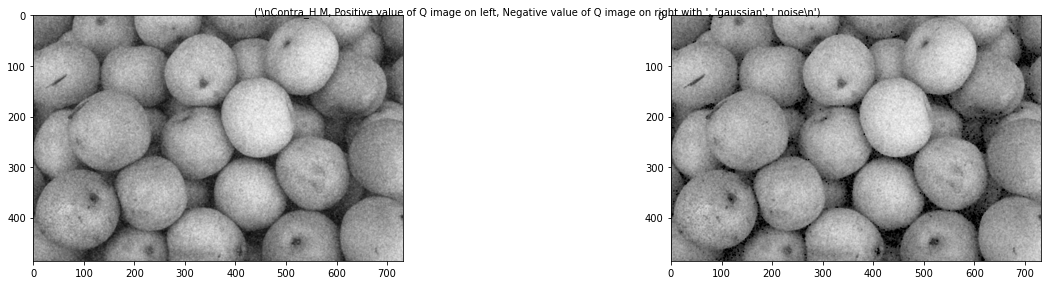

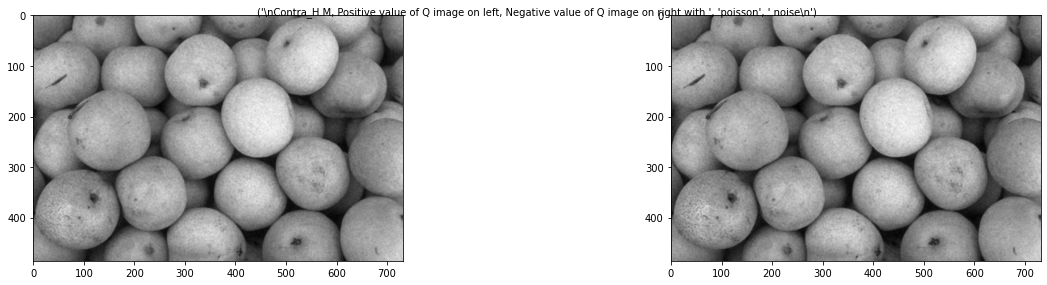

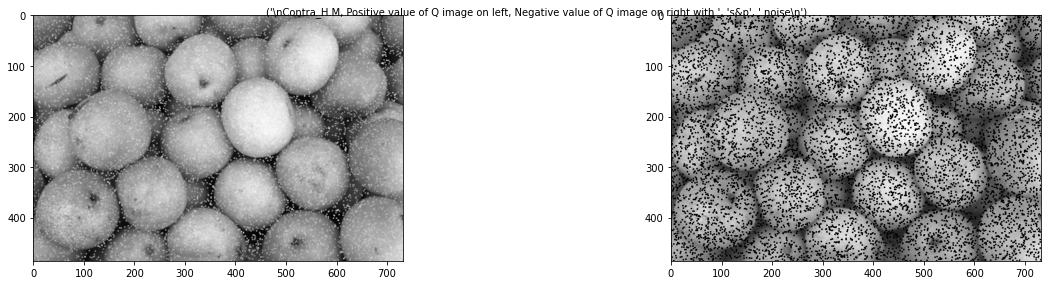

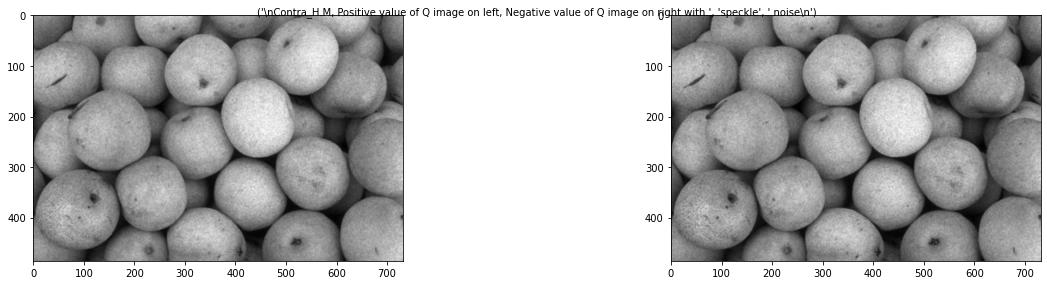

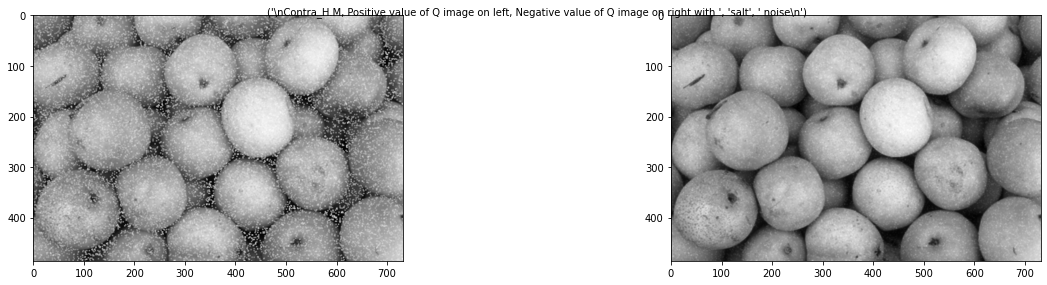

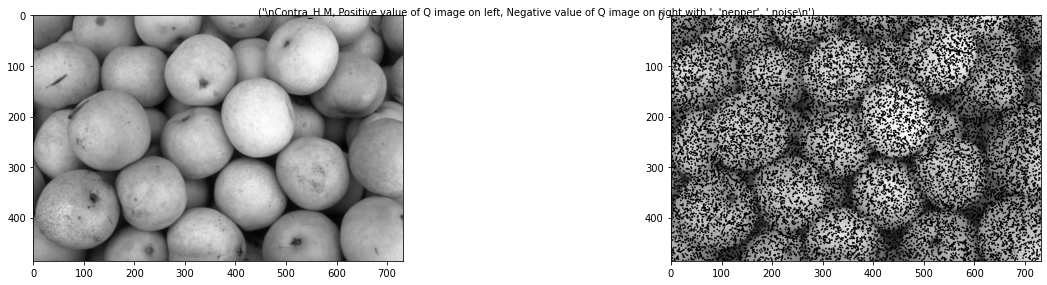

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import skimage.util
import skimage
from skimage import filters
import scipy.ndimage
from skimage.morphology import disk


def noise_gen(img, nn):
  

  out = []
  for i in range(len(nn)):
   out.append(skimage.util.random_noise(img, nn[i]))
   plt.imshow(out[0], cmap='gray')
   plt.title(nn[i] + "Noise")
   plt.show()
  
  return out

def contraHarmonicMean(img, noise, i, x, y, Q):

  mask = np.ones([3,3])
  output1=np.zeros([x,y])
  output2=np.zeros([x,y])

  output1 = cv2.filter2D(img**(Q+1),-1,mask)/cv2.filter2D(img**Q,-1,mask)
  output2= cv2.filter2D(img**(1-Q),-1,mask)/cv2.filter2D(img**(0-Q),-1,mask)

  string = "\nContra_H.M, Positive value of Q image on left, Negative value of Q image on right with ", noise, " noise\n"
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
  fig.suptitle(string, fontsize=10)
  axes[0].imshow(output1,cmap="gray")
  axes[1].imshow(output2,cmap="gray")
  fig.tight_layout()

def harmonicMean(img, nn, i, x, y):

  mask = np.ones([3,3])
  output=np.zeros([x,y])
  output = 9/cv2.filter2D(1/img,-1, mask)
  plt.figure()
  plt.imshow(output,cmap="gray")
  ttl = nn + " noise using Harmonic Mean"
  plt.title(ttl)

image = cv2.imread('pears.png',0)
x , y = image.shape
noise = []
noisenames = ['gaussian','poisson','s&p','speckle','salt','pepper']
noise = noise_gen(image, noisenames)

kernel = np.array([ 1, 1, 1, 1, 1 , 1, 1, 1, 1]).reshape(3, 3)/9

print("\nArithmetic Mean Filter on different Noises:\n")
for i in range(0,6):
  plt.imshow(cv2.filter2D(noise[i], -1, kernel), cmap='gray')
  plt.title(noisenames[i] + "Noise")
  plt.show()

print("\nMin Filter on different Noises:\n")
for i in range(0,6):
  plt.imshow(scipy.ndimage.filters.minimum_filter(noise[i], (3,3)), cmap='gray')
  plt.title(noisenames[i] + "Noise")
  plt.show()


print("\nMax Filter on different Noises:\n")
for i in range(0,6):
  plt.imshow(scipy.ndimage.filters.maximum_filter(noise[i], (3,3)), cmap='gray')
  plt.title(noisenames[i] + "Noise")
  plt.show()

print("\nMedian Filter on different Noises:\n")
for i in range(0,6):
  plt.imshow(scipy.ndimage.filters.median_filter(noise[i], (3,3)), cmap='gray')
  plt.title(noisenames[i] + "Noise")
  plt.show()

print("\nGeometric Mean Filter on different Noises:\n")
for i in range(0,6):
  plt.imshow(skimage.filters.rank.geometric_mean(noise[i], disk(3)), cmap='gray')
  plt.title(noisenames[i] + "Noise")
  plt.show()

print("\nHarmonic Mean Filter on different Noises:\n")
for i in range(0,6):
  harmonicMean(noise[i], noisenames[i], i,x,y)

print("\nContra Harmonic Mean Filter on different Noises:\n")
for i in range(0,6):
  contraHarmonicMean(noise[i], noisenames[i], i,x,y,1)

